In [1]:
#from __future__ import annotations
#from tkinter import N

from cart import *

import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe

#print(df)
#import csv



#####################################loading the carseats data#########################

df=pd.read_csv('Carseats_train.csv')
df=df.iloc[:,1:]

features_names=list(df.columns)

colonne=features_names[:6]
features_name=features_names[7:9]
features_names=colonne + features_name




n_features_names=list(df.columns)
columns = [(n_features_names[6])]
n_features_name = n_features_names[9:11]
n_features_names=columns + n_features_name




features=df.iloc[:,0:6]
features2=df.iloc[:,7:9]

features=dict(features)
features2=dict(features2)


n_features=df.iloc[:,6:7]
n_features2=df.iloc[:,9:11]


n_features=dict(n_features)
n_features2=dict(n_features2)

features = dict(features, **features2)
n_features = dict(n_features, **n_features2)


#############################################################################


#import itertools
#from statistics import mode
'''
print(features,'features',type(features))
print()
print(features_names,'features_names')
print()
print(n_features,'n_features')
print()
print(n_features_names,'n_features_names')
print()
'''
########################### y categorical #######################################
'''
High=[]
for i in features['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')

High=pd.DataFrame(High)
High=dict(High)
High['High'] = High.pop(0)

#y=High['High']

#exclude_keys = ['Sales']

#new_d = {k: features[k] for k in set(list(features.keys())) - set(exclude_keys)}
#features=new_d

#features_names=features_names[1:]
'''

######################y numerical#####################################
y=features['Price']
exclude_keys = ['Price']
new_d = {k: features[k] for k in set(list(features.keys())) - set(exclude_keys)}
features=new_d

indici = np.arange(0, len(y))

features_names3 = features_names[0:5]
features_names4 = features_names[6:]
features_names = features_names3 +  features_names4 

#############Data Prep for prediction ############
df_test=pd.read_csv('Carseats_test.csv')
df_test=df_test.iloc[:,1:]


features_test=df_test.iloc[:,0:6]
features2_test=df_test.iloc[:,7:9]

features_test=dict(features_test)
features2_test=dict(features2_test)


n_features_test=df_test.iloc[:,6:7]
n_features2_test=df_test.iloc[:,9:11]


n_features_test=dict(n_features_test)
n_features2_test=dict(n_features2_test)

features_test = dict(features_test, **features2_test)
n_features_test = dict(n_features_test, **n_features2_test)

y_test=features_test['Price']

y_test = y_test.tolist()

del features_test["Price"]   

#impurity = impurity_fn('MSE') # chhose the simplest impurity functin (for regression tree)

#impurity = Impurity ("MSE")
# start a tree structure by instantiating its root
#print("features", features)
#print("features_names", features_names)
#print("n_features", n_features)
#print("n_features_names", n_features_names)



############Program Running


###User Defined Function 



#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in CART
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])






In [2]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "pearson", problem="regression", method = "TWO-STAGE",  min_cases_parent= 10,min_cases_child= 5, max_level = 4, twoing = False, min_imp_gain = 0.0001)

cart.growing_tree(my_tree, max_k = 1)



Split Found:  n1 [['Sales', 7.54, 0.17589235831460692, 0]] start
node_proportion_total  0.17526417132062652
Split Found:  n2 [['Sales', 0.91, 0.09046547352009915, 1]] left
node_proportion_total  0.21142815871239193
Node_proportion_gain  0.036163987391765406
Node Search Split Error for:  n4 with obs in node:  5  which is less than minimum parent size:  10
TypeError
Split Found:  n5 [['Sales', 2.93, 0.021926958017563947, 2]] right
node_proportion_total  0.21885822325814283
Node_proportion_gain  0.007430064545750903
Node Search Split Error for:  n10 with obs in node:  9  which is less than minimum parent size:  10
TypeError
Split Found:  n11 [['Sales', 7.44, 0.017555029134579847, 3]] right
node_proportion_total  0.22442244120066246
Node_proportion_gain  0.005564217942519628
Split Found:  n22 [['Population', 94, 0.012984683899263327, 4]] left
node_proportion_total  0.22839668474774674
Node_proportion_gain  0.003974243547084283
Node Search Split Error for:  n23 with obs in node:  5  which i

((None, (None, ((None, None), None))),
 (((None, None), ((None, None), None)), (None, ((None, None), None))))

In [3]:
features["CompPrice"][1]

111

In [4]:
features["CompPrice"]

countleft = 0 
countright = 0 
for i in range(features["CompPrice"].shape[0]):
    if features["CompPrice"][i] > 127:
        countright +=1 #true
    else:
        countleft +=1 #false

countleft, countright

(162, 118)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 


Node,Node_type,Variable_Split,n,Impurity_Value,Class/Value
n1,Parent,Sales>7.54,280,155526.820000,115.775000
n2,Parent,Sales>0.91,147,62395.400000,125.177000
n4,Child,None,5,3860.800000,158.200000
n5,Parent,Sales>2.93,142,52889.970000,124.014000
n10,Child,None,9,2258.000000,135.000000
n11,Parent,Sales>7.44,133,49472.260000,123.271000
n23,Child,None,5,830.800000,136.200000
n22,Parent,Population>94,128,47772.970000,122.766000
n44,Child,None,20,6550.550000,117.650000
n45,Child,None,108,40602.100000,123.713000


{leaves : mean square error} =  {14: 549.4056600722431, 13: 547.5650228681011, 12: 547.6379032003467, 11: 528.5007047058895, 10: 523.5141697068809, 9: 530.8665666257233, 8: 558.1901656198667, 7: 559.023720156924, 6: 535.2174087053243, 3: 517.7256656169034, 2: 519.084830563528}
Best tree for test set has 3 leaves with a deviance of: 517.7256656169034 


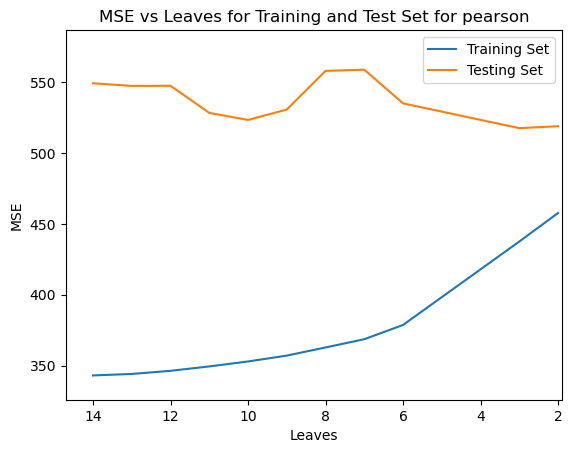

Node,Node_type,Variable_Split,n,Impurity_Value,Class/Value
n1,Parent,Sales>7.54,280,155526.820000,115.775000
n3,Child,None,133,65775.440000,105.383000
n2,Parent,Sales>0.91,147,62395.400000,125.177000
n4,Child,None,5,3860.800000,158.200000
n5,Child,None,142,52889.970000,124.014000
n5,Parent,Sales>2.93,142,52889.970000,124.014000
n3,Parent,Sales>9.7,133,65775.440000,105.383000


In [6]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test)
pruned_table.style.hide_index()


full dataset model 

In [7]:
df=pd.read_csv('Carseats.csv')
df=df.iloc[:,1:]

df.head()

features = df[features_names]
features.head()

n_features = df[n_features_names]
n_features.head()

y = df["Price"]
y.head()

indici = np.arange(0, len(y))


In [8]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 4)

#cart.growing_tree(my_tree)


need to somehow get only 29 leaves in final tree?
can't prune the traditional way as only have training set 

In [9]:
#cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 

